In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm

In [ ]:
df = pd.read_csv('n-gram_contents.csv')
df[:5000]

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
df = pd.read_csv('n-gram_corpus.csv')
def get_freq(DF):
    words_list = []
    try:
        for idx, words in enumerate(DF.ngrams):
            words_list.extend(words.replace('[','').replace(']','').replace('\'','').replace(' ','').split(','))
    except:
        print(idx)
        pass
    freq_counter = Counter(words_list)
    
    return freq_counter

FileNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm

df = pd.read_csv('n-gram_corpus.csv')
up_df = df[df['label'] == 'up']
down_df = df[df['label'] == 'down']
up_counter = get_freq(up_df)
down_counter = get_freq(down_df)
total_ngram = set(get_freq(df).keys())
df_score = pd.DataFrame(columns=['ngram','up_count','down_count'])
df_score.ngram = list(total_ngram)

for row, ngram in tqdm(enumerate(df_score.ngram)):
    df_score.loc[row,'up_count'] = up_counter[ngram]
    df_score.loc[row,'down_count'] = down_counter[ngram]
    
df_score['total_count'] = df_score['up_count'] + df_score['down_count']
df_score.drop(df_score.index[df_score[df_score.total_count<15].index], inplace=True)
df_score.sort_values(by='total_count', ascending=True)



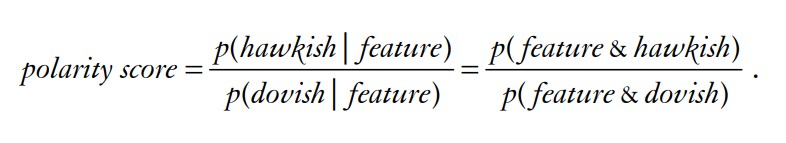

In [ ]:
n_hawkish = sum(df_score.up_count)
n_dovish = sum(df_score.down_count)

p_hawkish = df_score.up_count/n_hawkish
p_dovish = df_score.down_count/n_dovish

df_score['polar_score'] = p_hawkish.map(lambda x: np.float(x))/p_dovish.map(lambda x: np.float(x))
df_score['polarity'] = np.where(df_score['polar_score'] > (1.3/1), 'Hawkish', np.where(df_score['polar_score'] < (1/1.3), 'Dovish','nothing'))
df_score.reset_index(drop=True, inplace=True)

hawk_dic = df_score[df_score.polarity == 'Hawkish'].reset_index(drop=True)
dove_dic = df_score[df_score.polarity == 'Dovish'].reset_index(drop=True)

hawk_dic.to_csv('긍정사전.csv',index = False)
dove_dic.to_csv('부정사전.csv',index = False)